**Udemy 4-9. ANN for Regression**

In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D #Used for 3D plots

In [2]:
# Make the dataset
N = 1000
X = np.random.random((N,2)) * 6 - 3
Y = np.cos(2*X[:,0]) + np.sin(3*X[:,1])

This implemets the function:

\begin{align}
y = cos(2x_1) + sin(3x_2)
\end{align}






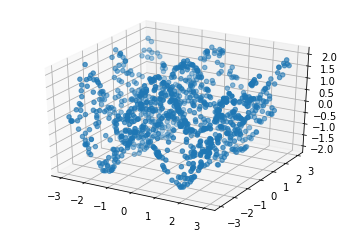

In [3]:
# Plot it
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

In [23]:
# Build the Model
model = nn.Sequential(
    nn.Linear(2,128),
    nn. ReLU(),
    nn.Linear(128,1),
)

In [5]:
# Loss and Optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [19]:
# Train the Model
def full_gd(model, criterion, optimizer, X_train, Y_train, epochs=1000):
  #Stuff to store
  train_losses = np.zeros(epochs)

  for it in range(epochs):
    # Zeros the parameters
    optimizer.zero_grad()

    # Forward Pass
    outputs = model(X_train)
    loss = criterion(Y_train, outputs)

    # Backward and Optimize
    loss.backward()
    optimizer.step()

    # Save losses
    train_losses[it] = loss.item()

    if (it + 1) % 100 == 0:
      print(f'Epoch {it+1}/{epochs}, train_loss: {loss.item():.4f}')
  return train_losses

X_train = torch.from_numpy(X.astype(np.float32))
Y_train = torch.from_numpy(Y.astype(np.float32).reshape(-1,1)) 
train_losses = full_gd(model, criterion, optimizer, X_train, Y_train)

Epoch 100/1000, train_loss: 0.0046
Epoch 200/1000, train_loss: 0.0024
Epoch 300/1000, train_loss: 0.0024
Epoch 400/1000, train_loss: 0.0179
Epoch 500/1000, train_loss: 0.0024
Epoch 600/1000, train_loss: 0.0171
Epoch 700/1000, train_loss: 0.0024
Epoch 800/1000, train_loss: 0.0080
Epoch 900/1000, train_loss: 0.0100
Epoch 1000/1000, train_loss: 0.0026


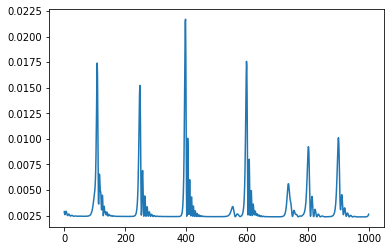

In [20]:
plt.plot(train_losses)

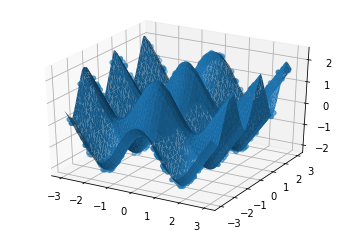

In [21]:
# Plot the prediction surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

# Surface Plot
with torch.no_grad():
  line = np.linspace(-3,3,50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat, linewidth = 0.2, antialiased=True)
  plt.show()

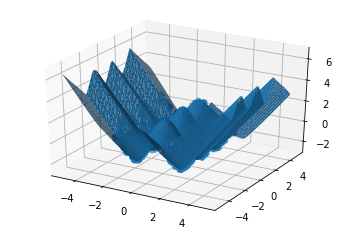

In [22]:
# Can it extrapolate
# plot the produced surface
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0],X[:,1],Y)

# Surface Plot
with torch.no_grad():
  line = np.linspace(-5,5,50)
  xx, yy = np.meshgrid(line, line)
  Xgrid = np.vstack((xx.flatten(),yy.flatten())).T
  Xgrid_torch = torch.from_numpy(Xgrid.astype(np.float32))
  Yhat = model(Xgrid_torch).numpy().flatten()
  ax.plot_trisurf(Xgrid[:,0],Xgrid[:,1],Yhat, linewidth = 0.2, antialiased=True)
  plt.show()